In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline


In [2]:
# Making plots more eye-appealing
rcParams['figure.figsize'] = 12, 6
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [3]:
train_df = pd.read_csv('../data/train.csv', index_col='PassengerId')
test_df = pd.read_csv('../data/test.csv', index_col='PassengerId')

In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [7]:
train_df.isna().sum()/(train_df.index[-1])*100


Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [8]:
test_df.isna().sum()/(test_df.index[-1])*100

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age          6.569901
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.076394
Cabin       24.980901
Embarked     0.000000
dtype: float64

In [9]:
train_df.drop(columns='Cabin', inplace=True)

In [10]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [11]:
test_df.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [12]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [13]:
model_features = ['Survived', 'Age', 'Fare']

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train_df['Embarked_n'] = encoder.fit_transform(train_df.fillna('NaN')['Embarked'])
test_df['Embarked_n']=encoder.transform(test_df.fillna('NaN')['Embarked'])

encoded_NaN = int(encoder.transform(['NaN']))
train_df.loc[train_df['Embarked_n']==encoded_NaN, 'Embarked_n'] = np.nan
test_df.loc[test_df['Embarked_n']==encoded_NaN, 'Embarked_n'] = np.nan

train_df['Sex_n'] = encoder.fit_transform(train_df['Sex'])
test_df['Sex_n'] = encoder.transform(test_df['Sex'])

model_features.append('Sex_n')
model_features.append('Embarked_n')

In [15]:
IMPUTABLE_FEATURES = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_n', 'Sex_n']
import impyute
train_df[IMPUTABLE_FEATURES] = impyute.mice(train_df[IMPUTABLE_FEATURES].values) 
test_df[IMPUTABLE_FEATURES] = impyute.mice(test_df[IMPUTABLE_FEATURES].values) 

In [16]:
train_df['Embarked_n'] = train_df['Embarked_n'].apply(round)

In [17]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Embarked_n    0
Sex_n         0
dtype: int64

<AxesSubplot:>

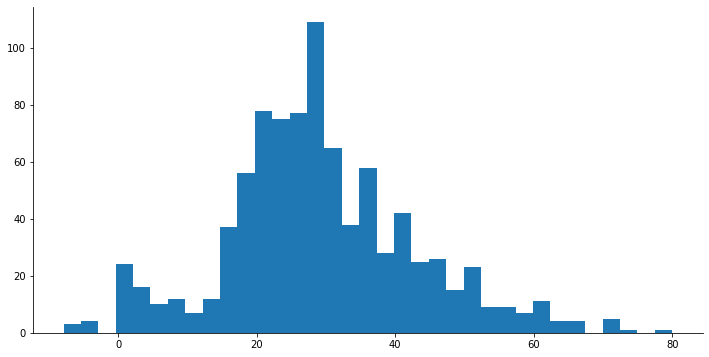

In [ ]:
train_df['Age'].hist(bins=35, grid=False)

In [ ]:
train_df['Fare'].hist(bins=100, grid=False)

In [ ]:
print(train_df['Pclass'].value_counts(), '\n')
print(test_df['Pclass'].value_counts())

In [ ]:
for i in set(train_df['Pclass'].unique())|set(test_df['Pclass'].unique()):
    i = int(i)
    
    train_df[f'Pclass_{i}'] = train_df['Pclass'].apply(lambda x: 1 if x==i else 0)

    test_df[f'Pclass_{i}'] = test_df['Pclass'].apply(lambda x: 1 if x==i else 0)
    
    model_features.append(f'Pclass_{i}')

In [ ]:
print(train_df['Parch'].value_counts(), '\n')
print(test_df['Parch'].value_counts())

In [ ]:
train_df['Parch_0'] = train_df['Parch'].apply(lambda x: 1 if x==0 else 0)
train_df['Parch_1+'] = train_df['Parch'].apply(lambda x: 1 if x>=1 else 0)

test_df['Parch_0'] = test_df['Parch'].apply(lambda x: 1 if x==0 else 0)
test_df['Parch_1+'] = test_df['Parch'].apply(lambda x: 1 if x>=1 else 0)

model_features.append('Parch_0')
model_features.append('Parch_1+')  

In [ ]:
print(train_df['SibSp'].value_counts(), '\n')
print(test_df['SibSp'].value_counts())

In [ ]:
train_df['SibSp_0'] = train_df['SibSp'].apply(lambda x: 1 if x==0 else 0)
train_df['SibSp_1+'] = train_df['SibSp'].apply(lambda x: 1 if x>=1 else 0)

test_df['SibSp_0'] = test_df['SibSp'].apply(lambda x: 1 if x==0 else 0)
test_df['SibSp_1+'] = test_df['SibSp'].apply(lambda x: 1 if x>=1 else 0)

model_features.append('SibSp_0')
model_features.append('SibSp_1+')  


In [ ]:
sns.boxplot(x=train_df['Sex'], y=train_df['Age'])

In [ ]:
pd.pivot_table(train_df, index=['Sex'], values=['Age'], aggfunc='mean')

In [ ]:
pd.pivot_table(train_df, index= ['Sex'], values=['Survived'], aggfunc='mean')

In [ ]:
train_df.loc[train_df['Sex']=='male','Age']

In [ ]:
train_df['Survived'].mean()

In [ ]:
train_df.info()

In [ ]:
train_df_save = train_df[model_features]
test_df_save = test_df[model_features[1:]]

In [ ]:
train_df_save.to_csv("../data/train_processed.csv", index=None)
test_df_save.to_csv("../data/test_processed.csv", index=None)

In [ ]:
train_df_save.to_csv("../data/train_processed.csv", index=None)
test_df_save.to_csv("../data/test_processed.csv", index=None)

In [ ]:
train_df.info()

In [ ]:
train_df_save = train_df[model_features]
test_df_save = test_df[model_features[1:]]

In [ ]:
train_df_save.to_csv("../data/train_processed.csv", index=None)
test_df_save.to_csv("../data/test_processed.csv", index=None)

In [ ]:
train_df_save

In [ ]:
train_df_save.to_csv("../data/train_processed.csv", index=None)
test_df_save.to_csv("../data/test_processed.csv", index=None)

In [ ]:
train_df_save.to_csv("../data/train_processed.csv", index=None)
test_df_save.to_csv("../data/test_processed.csv", index=None)

In [ ]:
train_df.info()

In [ ]:
train_df_save = train_df[model_features]
test_df_save = test_df[model_features[1:]]

In [ ]:
train_df_save.to_csv("../data/train_processed.csv", index=None)
test_df_save.to_csv("../data/test_processed.csv", index=None)

In [ ]:
train_df_save
